In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

sns.set()

%config InlineBackend.figure_format = 'retina'

In [191]:
df = pd.read_csv('../../data/growth_shaker/20211007_OD_shaker.csv')
df = df.melt(id_vars=['Strain', 'Growth Condition'], var_name='time', value_name='OD')
dates = [datetime.strptime(x, '%I:%M')  for x in df.time]
df.loc[:, 'time'] = [float(x.time().hour * 60 + x.time().minute) for x in dates]
df.rename(columns={'time': 'time [min]'}, inplace=True)
df.head()

,Strain,Growth Condition,time [min],OD
0,MG1655,Shaker 5ml 37C,120.0,0.13
1,MG1655,Shaker 5ml 22C,120.0,0.04
2,MG1655,37C Incubator,120.0,0.05
3,3.19,Shaker 5ml 37C,120.0,0.16
4,3.19,Shaker 5ml 22C,120.0,0.13


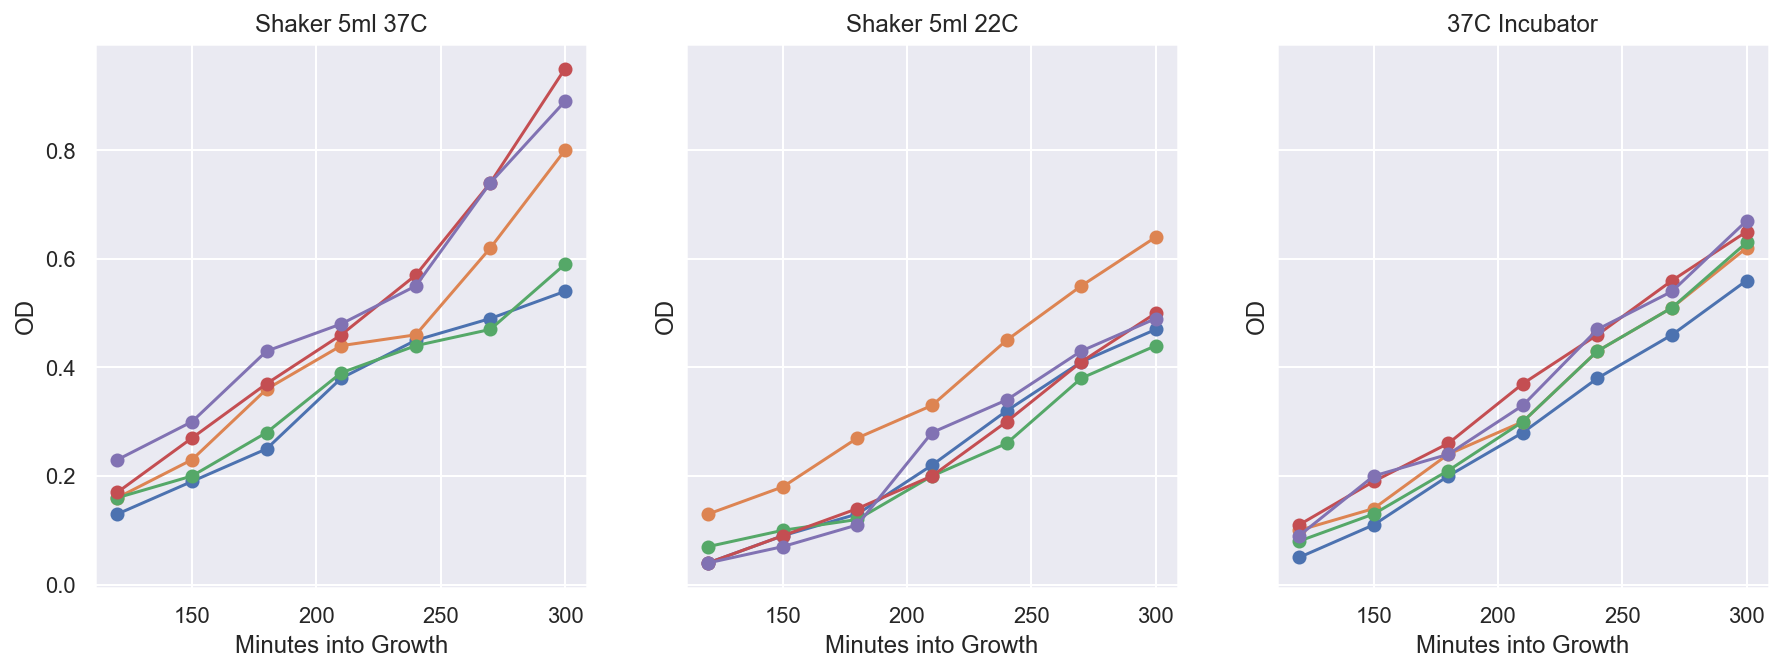

In [211]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, gs in enumerate(df['Growth Condition'].unique()):
    df1 = df[df['Growth Condition'] == gs]
    ax[i].set_title(gs)
    ax[i].set_xlabel("Minutes into Growth")
    ax[i].set_ylabel("OD")
    for strain in df.Strain.unique():
        ax[i].plot(
            df1[df1.Strain == strain]['time [min]'], 
            df1[df1.Strain == strain].OD, 
            "o-",
        )

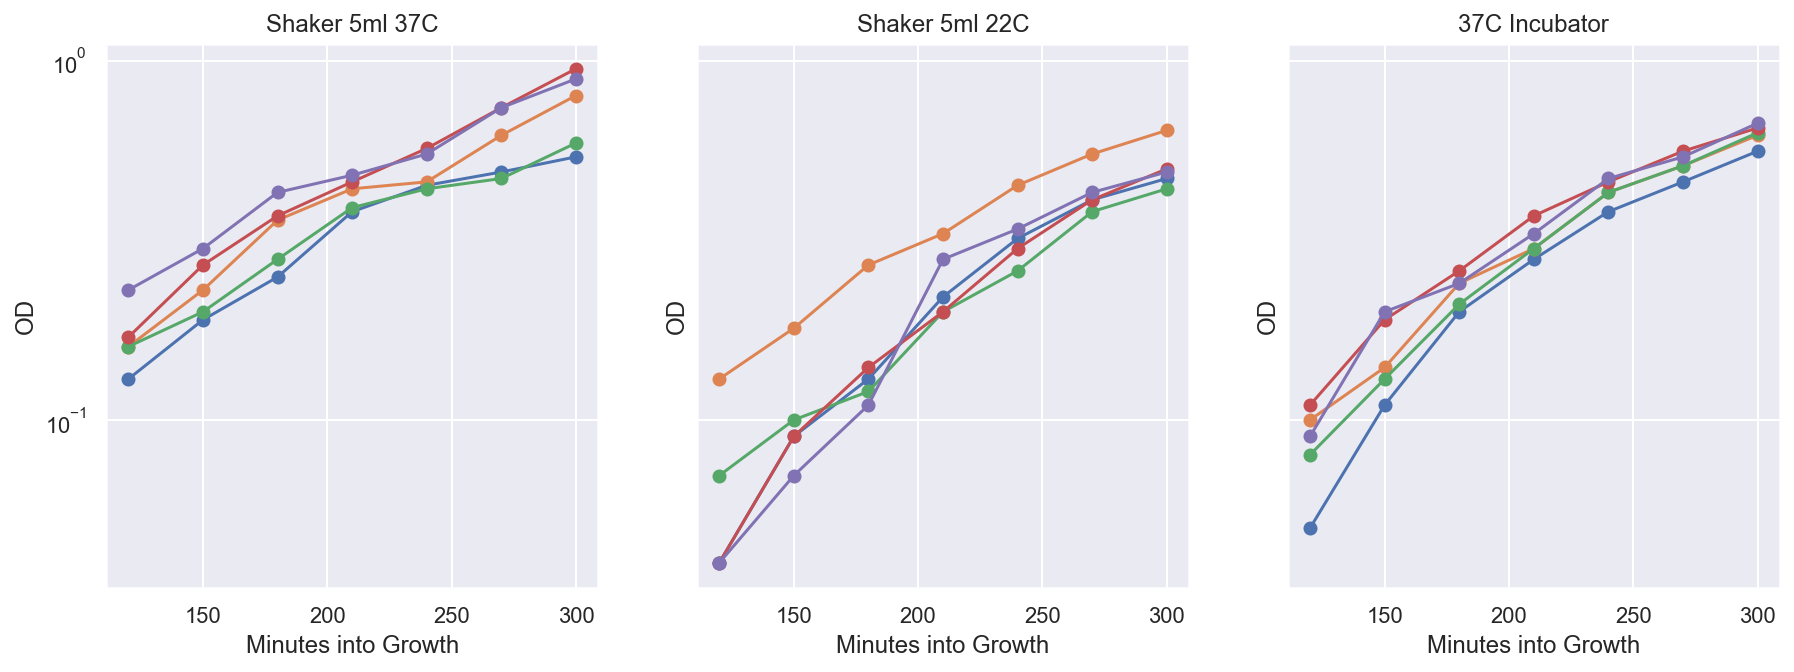

In [212]:
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')

fig

In [213]:
df_agg = df.groupby(['time [min]', 'Growth Condition'])['OD'].agg([np.mean, np.std]).reset_index()

In [214]:
df_agg.head()

,time [min],Growth Condition,mean,std
0,120.0,37C Incubator,0.086,0.023022
1,120.0,Shaker 5ml 22C,0.064,0.039115
2,120.0,Shaker 5ml 37C,0.170,0.036742
3,150.0,37C Incubator,0.154,0.039115
4,150.0,Shaker 5ml 22C,0.106,0.042778


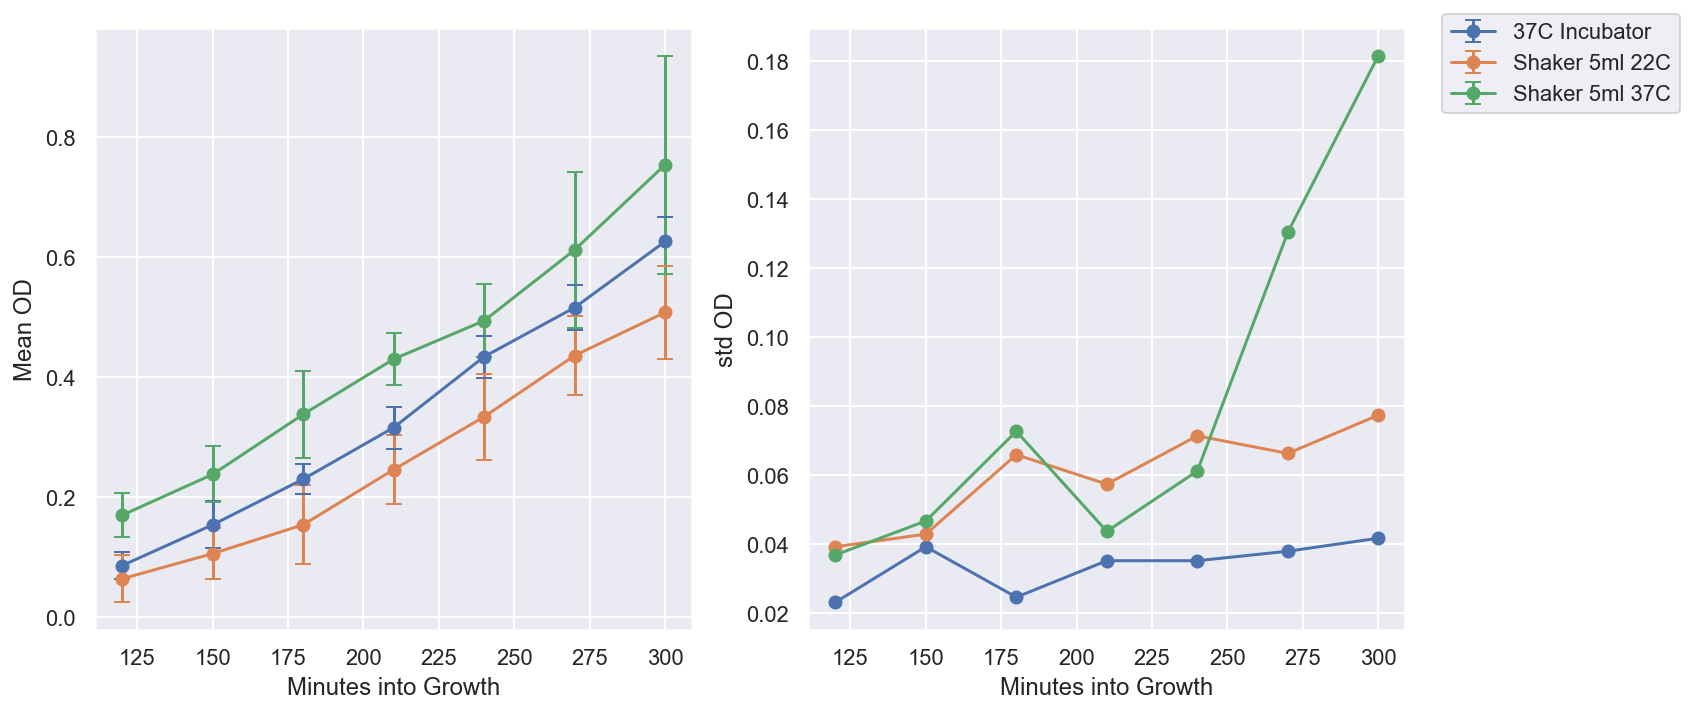

In [215]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i, gs in enumerate(df_agg['Growth Condition'].unique()):
    df1 = df_agg[df_agg['Growth Condition'] == gs]
    ax[0].errorbar(
        df1['time [min]'], 
        df1['mean'],
        df1['std'],
        fmt="o-",
        label=gs,
        capsize=4
    )
    
    ax[1].plot(
        df1['time [min]'], 
        df1['std'],
        "o-",
    )
    
#ax.set_title()
ax[0].set_xlabel("Minutes into Growth")
ax[1].set_xlabel("Minutes into Growth")
ax[0].set_ylabel("Mean OD")
ax[1].set_ylabel("std OD")
fig.legend(bbox_to_anchor=(1.18, 1));
fig.tight_layout()

In [216]:
df2 = pd.read_csv('../../data/growth_shaker/20211006_OD_shaker.csv')
df2 = df2.melt(id_vars=['Strain', 'Growth Condition'], var_name='time', value_name='OD')
df2 = df2[df2.time != 'OD in LB ']
dates = [datetime.strptime(x, '%I:%M')  for x in df2.time]
df2.loc[:, 'time'] = [float(x.time().hour * 60 + x.time().minute) for x in dates]
df2.rename(columns={'time': 'time [min]'}, inplace=True)
df2.head()

,Strain,Growth Condition,time [min],OD
20,MG1655,Shaker 5ml,240.0,0.09
21,MG1655,Shaker 3ml,240.0,0.07
22,MG1655,37C Incubator,240.0,0.42
23,MG1655,Bench,240.0,0.25
24,3.19,Shaker 5ml,240.0,0.05


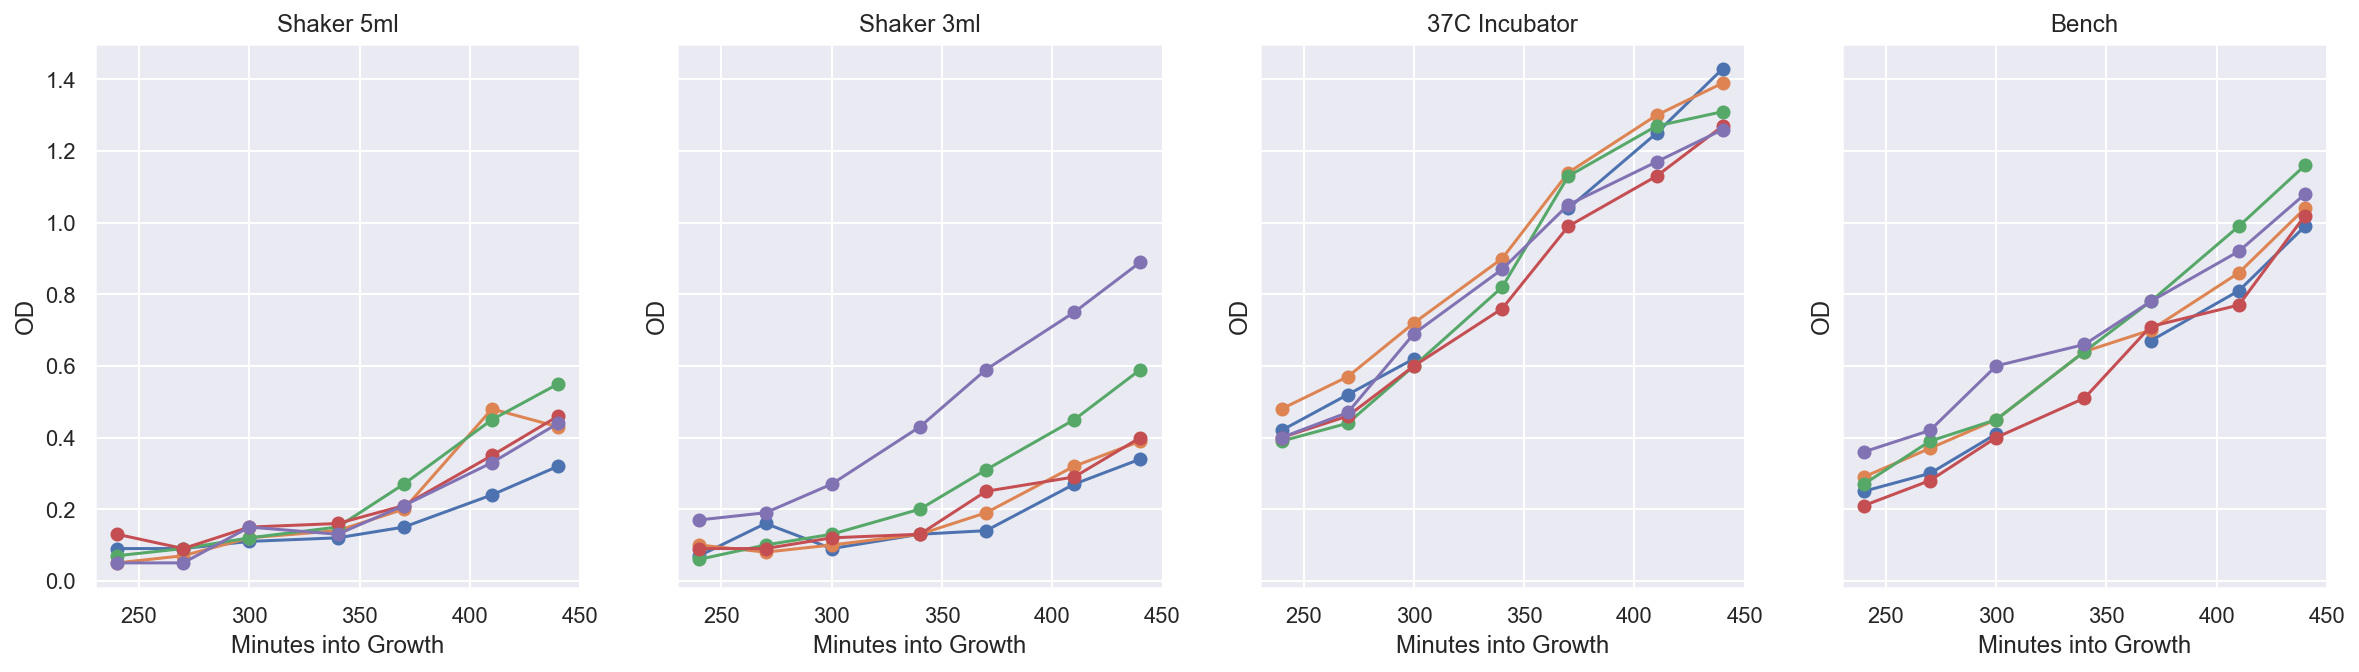

In [217]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i, gs in enumerate(df2['Growth Condition'].unique()):
    _df = df2[df2['Growth Condition'] == gs]
    ax[i].set_title(gs)
    ax[i].set_xlabel("Minutes into Growth")
    ax[i].set_ylabel("OD")
    for strain in df.Strain.unique():
        ax[i].plot(
            _df[_df.Strain == strain]['time [min]'], 
            _df[_df.Strain == strain].OD, 
            "o-",
            
        )

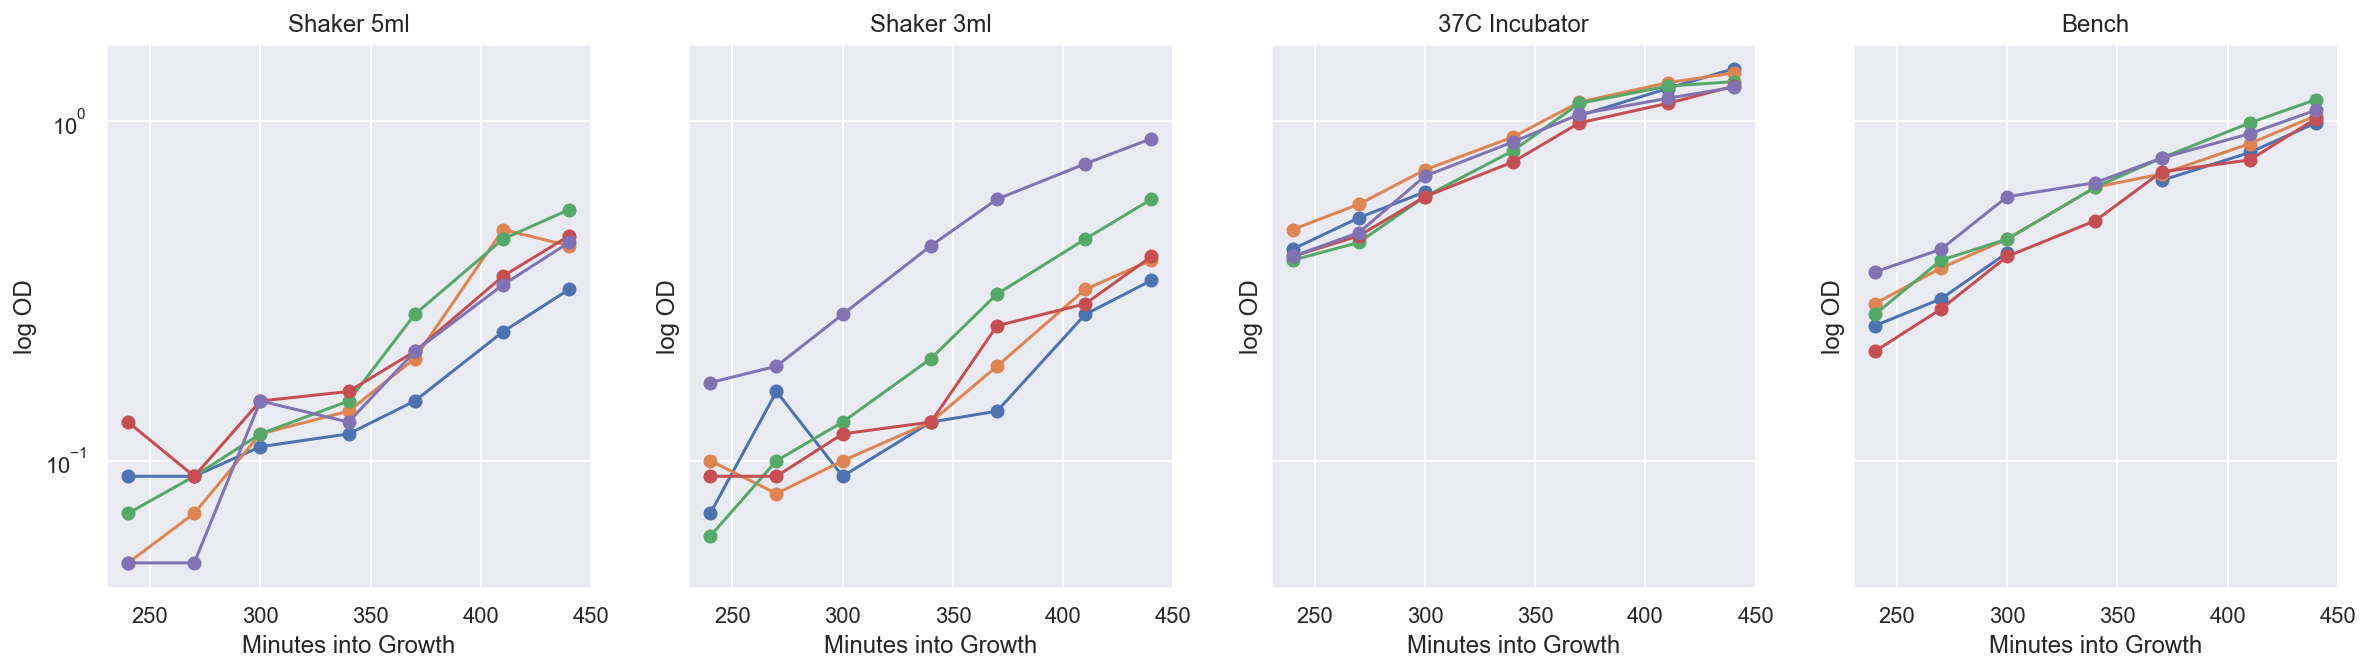

In [218]:
for i in range(4):
    ax[i].set_ylabel("log OD")
    ax[i].set_yscale('log')
    #ax[i].axes.yaxis.set_ticklabels([])
    ax[i].minorticks_off()


#fig.tight_layout()

fig

In [219]:
df_agg = df2.groupby(['time [min]', 'Growth Condition'])['OD'].agg([np.mean, np.std]).reset_index()

In [220]:
df_agg.head()

,time [min],Growth Condition,mean,std
0,240.0,37C Incubator,0.418,0.036332
1,240.0,Bench,0.276,0.055498
2,240.0,Shaker 3ml,0.098,0.043243
3,240.0,Shaker 5ml,0.078,0.033466
4,270.0,37C Incubator,0.492,0.052631


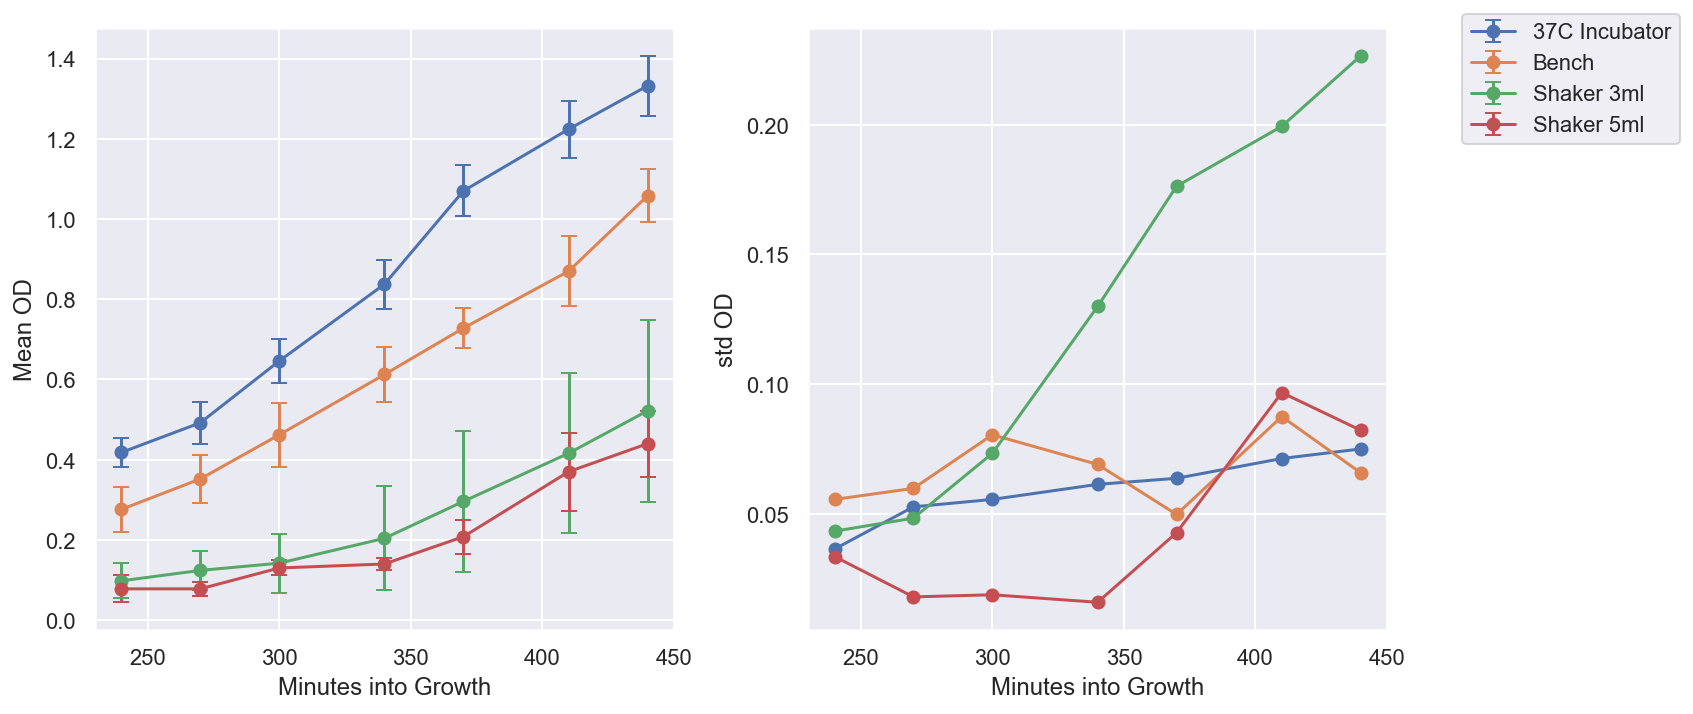

In [221]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i, gs in enumerate(df_agg['Growth Condition'].unique()):
    df1 = df_agg[df_agg['Growth Condition'] == gs]
    ax[0].errorbar(
        df1['time [min]'], 
        df1['mean'],
        df1['std'],
        fmt="o-",
        label=gs,
        capsize=4
    )
    
    ax[1].plot(
        df1['time [min]'], 
        df1['std'],
        "o-",
    )
    
#ax.set_title()
ax[0].set_xlabel("Minutes into Growth")
ax[1].set_xlabel("Minutes into Growth")
ax[0].set_ylabel("Mean OD")
ax[1].set_ylabel("std OD")
fig.legend(bbox_to_anchor=(1.18, 1));
fig.tight_layout()